# Object Detection(Car Detection)




### DOMAIN: 
Automotive , Surveillance
### CONTEXT: 
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is 
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of 
the car, type, colour, number plates etc
### DATA DESCRIPTION: 
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing 
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 
2012 Tesla Model S or 2012 BMW M3 coupe
‣ Train Images: Consists of real images of cars as per the make and year of the car. 
‣ Test Images: Consists of real images of cars as per the make and year of the car.
‣ Train Annotation: Consists of bounding box region for training images.
‣ Test Annotation: Consists of bounding box region for testing images.
Dataset has been attached along with this project. Please use the same for this capstone project
Dataset: Original dataset link for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
### REFERENCE: 
3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE 
Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
### PROJECT OBJECTIVE: 
Design a DL based car identification model

In [ ]:
%tensorflow_version 2.x
#%tensorflow_version 1.x

In [ ]:
# Lets check version of tensor flow and keras installed 

import tensorflow
print(tensorflow.__version__)

2.8.0


In [ ]:
import keras
print(keras.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


All the above versions libraries are required for the Third party implementation we are goin to use

## Legend

 ### Insights/inferences/results have been displayed post each step

In [ ]:
# Lets check if we are connected to GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


## 1.0 Basic Config & Settings

### 1.1 Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

#Additional libs
import matplotlib.patches as patches


In [ ]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

### 1.2 Set Necessary variables

In [ ]:
# Read The Data Set


images_path = "/content/drive/MyDrive/Capstone/Car Images/Car Images/"

#Lets note here that our images are structred as folders.Each folder is a cart type
#Corresponding folder will contain images of THAT car  type
#We have a seperate folder for Train and Test IMages

In [ ]:
# Variables required for model Building

images_height=300
images_width=300

## 2.0 Create Data Splits


In [ ]:
# Retrieve pickled data

X_Train_CompleteData = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train.npy")
Y_Train_CompleteData  = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train.npy")

In [ ]:
X_Train_CompleteData.shape
Y_Train_CompleteData.shape

(8144, 300, 300, 3)

(8144, 5)

In [ ]:
# Retrieve pickled data

#X_Test_CompleteData = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test.npy")
#Y_Test_CompleteData = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test.npy")

In [ ]:
# Let us work first with the train data 
# If we use both , we are seeing RAM crashes

In [ ]:
Y_Train_CompleteData_df=pd.DataFrame(data=Y_Train_CompleteData)

In [ ]:
Y_Train_CompleteData_df.head()

,0,1,2,3,4
0,37.0000000,56.0000000,276.0000000,268.0000000,184.0000000
1,18.0000000,21.0000000,277.0000000,258.0000000,184.0000000
2,18.0000000,135.0000000,184.0000000,225.0000000,184.0000000
3,61.0000000,72.0000000,196.0000000,245.0000000,184.0000000
4,3.0000000,5.0000000,283.0000000,263.0000000,184.0000000


In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X_Train_CompleteData,Y_Train_CompleteData,test_size=0.2,random_state=1,stratify=Y_Train_CompleteData_df[4])
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

X_Train.shape (6515, 300, 300, 3)
X_Test.shape (1629, 300, 300, 3)
Y_Train.shape (6515, 5)
Y_Test.shape (1629, 5)


In [ ]:
Y_Test_df=pd.DataFrame(data=Y_Test)

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X_Test,Y_Test,test_size=0.2,random_state=1,stratify=Y_Test_df[4])
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

X_Train.shape (1303, 300, 300, 3)
X_Test.shape (326, 300, 300, 3)
Y_Train.shape (1303, 5)
Y_Test.shape (326, 5)


In [ ]:
Y_Train[0:5]

array([[ 26.,  80., 269., 230., 170.],
       [  0., 133., 295., 295.,  80.],
       [  9.,  21., 289., 296., 162.],
       [  4.,  52., 289., 228.,  57.],
       [ 80.,  80., 219., 245.,  78.]])

In [ ]:

# NTS: to_pickle function not available , have to use save and in npy format 
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train_Subset.npy",X_Train)
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train_Subset.npy",Y_Train)

np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test_Subset.npy",X_Test)
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test_Subset.npy",Y_Test)

## 3.0 Retrive Pickled  Data Splits


In [ ]:

X_Train = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train_Subset.npy")
Y_Train  = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train_Subset.npy")

In [ ]:
X_Test = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test_Subset.npy")
Y_Test  = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test_Subset.npy")

## 4.0 Prepare Data for model building

In [ ]:
# Below we build our baseline n/w

In [ ]:
# First prepare data for Mobile Net model we will build

In [ ]:
X_Train.shape
Y_Train.shape
X_Test.shape
Y_Test.shape

(1303, 300, 300, 3)

(1303, 5)

(326, 300, 300, 3)

(326, 5)

In [ ]:
Y_Test[0:5]

array([[ 15.,  69., 282., 277., 113.],
       [ 82., 123., 238., 242., 177.],
       [ 55.,  16., 271., 295., 112.],
       [ 20.,  30., 299., 222.,  61.],
       [ 33.,  94., 282., 247., 123.]])

In [ ]:
# First lets convert it into integers all numbers 

Y_Train=Y_Train.astype(int)
Y_Test=Y_Test.astype(int)

In [ ]:
Y_Train[0:5]
Y_Test[0:5]

array([[ 26,  80, 269, 230, 170],
       [  0, 133, 295, 295,  80],
       [  9,  21, 289, 296, 162],
       [  4,  52, 289, 228,  57],
       [ 80,  80, 219, 245,  78]])

array([[ 15,  69, 282, 277, 113],
       [ 82, 123, 238, 242, 177],
       [ 55,  16, 271, 295, 112],
       [ 20,  30, 299, 222,  61],
       [ 33,  94, 282, 247, 123]])

In [ ]:
# Prepare labels for Classification Head

In [ ]:
Y_Train_MobileNet_ClassInput=np.delete(Y_Train,obj=[0,1,2,3],axis=1)

In [ ]:
Y_Test_MobileNet_ClassInput=np.delete(Y_Test,obj=[0,1,2,3],axis=1)

In [ ]:
Y_Train_MobileNet_ClassInput.max()
print('\n')
Y_Train_MobileNet_ClassInput.min()
print('\n')
Y_Test_MobileNet_ClassInput.max()
print('\n')
Y_Test_MobileNet_ClassInput.min()
print('\n')

196

1

196

1

In [ ]:
# Classes dont start from 0 so
# First encode
#Then convert to OHV

In [ ]:
# Lets convert these labels to one hot vectors

# First encode the labels ,they are from 1 to 196, we want them to be from 0 to 195
# Deep learing : Lets try a simple ANN on the data 

from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_Train_MobileNet_ClassInput)
Y_Train_MobileNet_ClassInput= encoder.transform(Y_Train_MobileNet_ClassInput)
Y_Test_MobileNet_ClassInput = encoder.transform(Y_Test_MobileNet_ClassInput)
#type(encoded_YTrain)

LabelEncoder()

In [ ]:
# Recheck max and min

Y_Train_MobileNet_ClassInput.max()
print('\n')
Y_Train_MobileNet_ClassInput.min()
print('\n')
Y_Test_MobileNet_ClassInput.max()
print('\n')
Y_Test_MobileNet_ClassInput.min()
print('\n')

# Looks good now  range(0,195)

195

0

195

0

In [ ]:
Y_Train_MobileNet_ClassInput[5]
print("\n")
Y_Train[5][4]

#Looks good

176

177

In [ ]:
# Now the same for Test

Y_Test_MobileNet_ClassInput[5]
print("\n")
Y_Test[5][4]

#Looks good

161

162

In [ ]:
## Label encoding has ben done correctly, lets proceed

In [ ]:
Y_Train_MobileNet_ClassInput.shape

(1303,)

In [ ]:
pd.DataFrame(Y_Train_MobileNet_ClassInput).value_counts().sort_index()

0       7
1       5
2       7
3       6
4       6
5       7
6       7
7       7
8       6
9       5
10      6
11      6
12      6
13      7
14      7
15      7
16      7
17      7
18      6
19      7
20      6
21      7
22      6
23      7
24      6
25      6
26      6
27      7
28      7
29      7
30      7
31      6
32      6
33      7
34      7
35      6
36      6
37      7
38      6
39      6
40      6
41      6
42      7
43      7
44      5
45      7
46      6
47      7
48      7
49      7
50      7
51      6
52      7
53      6
54      7
55      7
56      6
57      7
58      7
59      6
60      7
61      6
62      7
63      5
64      7
65      6
66      6
67      7
68      6
69      7
70      6
71      7
72      7
73      7
74      7
75      7
76      7
77      7
78      8
79      7
80      7
81      7
82      6
83      7
84      7
85      7
86      7
87      7
88      7
89      7
90      7
91      7
92      7
93      7
94      7
95      7
96      7
97      7
98      4
99      6


In [ ]:
pd.DataFrame(Y_Test_MobileNet_ClassInput).value_counts().sort_index()

0      2
1      1
2      2
3      2
4      2
5      2
6      1
7      2
8      2
9      1
10     1
11     1
12     2
13     2
14     2
15     2
16     1
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     1
26     1
27     1
28     2
29     1
30     2
31     2
32     2
33     2
34     1
35     2
36     2
37     1
38     1
39     2
40     1
41     1
42     2
43     2
44     1
45     2
46     1
47     2
48     1
49     1
50     2
51     2
52     2
53     2
54     1
55     2
56     2
57     2
58     2
59     1
60     2
61     1
62     2
63     1
64     2
65     2
66     2
67     1
68     1
69     2
70     1
71     2
72     2
73     2
74     2
75     2
76     1
77     1
78     2
79     2
80     2
81     2
82     2
83     1
84     2
85     2
86     2
87     1
88     2
89     1
90     1
91     1
92     1
93     2
94     2
95     1
96     1
97     2
98     1
99     1
100    1
101    1
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
1

In [ ]:
# Convert to OHV
# Convert above  to One hot vectors 
from tensorflow.keras.utils import to_categorical

Y_Train_MobileNet_ClassInput = to_categorical(Y_Train_MobileNet_ClassInput, num_classes=196)
Y_Test_MobileNet_ClassInput = to_categorical(Y_Test_MobileNet_ClassInput, num_classes=196)

print("Y_Train_MobileNet_ClassInput.shape",Y_Train_MobileNet_ClassInput.shape)
print("Y_Test_MobileNet_ClassInput.shape",Y_Test_MobileNet_ClassInput.shape)

Y_Train_MobileNet_ClassInput.shape (1303, 196)
Y_Test_MobileNet_ClassInput.shape (326, 196)


In [ ]:
Y_Train_MobileNet_ClassInput[0]
Y_Test_MobileNet_ClassInput[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Cross verify transofmration have been done correctly 
#On Train
Y_Train_MobileNet_ClassInput[0]
Originial=np.argmax(Y_Train_MobileNet_ClassInput[0])
print("\n")
print("Inverse Label",encoder.inverse_transform([Originial]))
print("Original",Y_Train[0][4])

#On Test
Y_Test_MobileNet_ClassInput[0]
Originial=np.argmax(Y_Test_MobileNet_ClassInput[0])
print("\n")
print("Inverse Label",(encoder.inverse_transform([Originial])))
print("Original",Y_Test[0][4])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)



Inverse Label [170]
Original 170


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)



Inverse Label [113]
Original 113


In [ ]:
### Now lets prepare labels for Regression Head

In [ ]:
# Lets remove labels of class
Y_Train_MobileNet_BoxInput=np.delete(Y_Train,obj=[4],axis=1)

In [ ]:
# Lets remove label of class
Y_Test_MobileNet_BoxInput=np.delete(Y_Test,obj=[4],axis=1)

In [ ]:
Y_Train_MobileNet_BoxInput.shape
Y_Test_MobileNet_BoxInput.shape

(1303, 4)

(326, 4)

In [ ]:
# Lets prepare X data for Mobile net(will remain same for both reg and class head)
from PIL import Image
from keras.applications.mobilenet import preprocess_input
import cv2

X_Train_MobileNet=X_Train.copy()
#X_Train_EffNet=np.zeros((X_Train.shape[0],300,300,3))

X_Train.shape

'''for i, f in enumerate(X_Train):
  #Our classification n/w requires 300*300 images
  X_Train_EffNet[i,:,:,:] = cv2.resize(X_Train[i], dsize=(300, 300), interpolation=cv2.INTER_CUBIC)'''


for i, f in enumerate(X_Train):
  X_Train_MobileNet[i] = preprocess_input(X_Train_MobileNet[i]) # Convert to float32 array

(1303, 300, 300, 3)

'for i, f in enumerate(X_Train):\n  #Our classification n/w requires 300*300 images\n  X_Train_EffNet[i,:,:,:] = cv2.resize(X_Train[i], dsize=(300, 300), interpolation=cv2.INTER_CUBIC)'

In [ ]:
#X_Train_EffNet.shape
X_Train_MobileNet.shape

(1303, 300, 300, 3)

In [ ]:
X_Test_MobileNet=X_Test.copy()
#X_Test_EffNet=np.zeros((X_Test.shape[0],300,300,3))

'''for i, f in enumerate(X_Test):
  #Our classification n/w requires 300*300 images
  X_Test_EffNet[i,:,:,:] = cv2.resize(X_Test[i], dsize=(300, 300), interpolation=cv2.INTER_CUBIC)'''

for i, f in enumerate(X_Test):
  X_Test_MobileNet[i] = preprocess_input(np.array(X_Test_MobileNet[i], dtype=np.float32)) # Convert to float32 array

'for i, f in enumerate(X_Test):\n  #Our classification n/w requires 300*300 images\n  X_Test_EffNet[i,:,:,:] = cv2.resize(X_Test[i], dsize=(300, 300), interpolation=cv2.INTER_CUBIC)'

In [ ]:
#X_Test_EffNet.shape
X_Test_MobileNet.shape

(326, 300, 300, 3)

In [ ]:
#np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train_EffNet.npy",X_Train_EffNet)
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train_MobileNet.npy",X_Train_MobileNet)
#np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test_EffNet.npy",X_Test_EffNet)
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test_MobileNet.npy",X_Test_MobileNet)

np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train_MobileNet_BoxInput.npy",Y_Train_MobileNet_BoxInput)

np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train_MobileNet_ClassInput.npy",Y_Train_MobileNet_ClassInput)

np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test_MobileNet_BoxInput.npy",Y_Test_MobileNet_BoxInput)

np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test_MobileNet_ClassInput.npy",Y_Test_MobileNet_ClassInput)


In [ ]:
#STOP

## 5.0 Build Model

In [ ]:
#X_Train_EffNet= np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train_EffNet.npy")

#X_Train_MobileNet=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train_MobileNet.npy")

#X_Test_EffNet=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test_EffNet.npy")

X_Test_MobileNet=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test_MobileNet.npy")

#Y_Train_MobileNet_BoxInput=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train_MobileNet_BoxInput.npy")

#Y_Train_MobileNet_ClassInput=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train_MobileNet_ClassInput.npy")

Y_Test_MobileNet_BoxInput=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test_MobileNet_BoxInput.npy")

Y_Test_MobileNet_ClassInput=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test_MobileNet_ClassInput.npy")


In [ ]:
X_Batch=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Batcht.npy")
Y_Batch=np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Batch.npy")

In [ ]:
import pickle

# open a file, where you stored the pickled data
file = open('/content/drive/MyDrive/Capstone/Pickled_Info/Classindices.pkl', 'rb')

# dump information to that file
classDict = pickle.load(file)

In [ ]:
# Create reg model and load its weights
# Lets build the model

from keras.applications.mobilenet import MobileNet
from keras.models import Model,load_model
from keras.layers import Conv2D, Reshape,Flatten,Dense,Dropout,GlobalAveragePooling2D,BatchNormalization,Input
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ALPHA = 1.0

def create_reg_od_model(trainable=True):
    regODModel = MobileNet(input_shape=(images_height, images_width, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in regODModel.layers:
        layer.trainable = trainable
    
    # Add new top layer for Regression Head
    regODModelOP = regODModel.layers[-1].output
    regODModelOP = Flatten()(regODModelOP)
    regODModelOP = Dense(units=4,name="box_output")(regODModelOP) # These are the 4 predicted coordinates of one BBox
    #boxPredicModel = Dense(units=4)(boxPredicModel) # These are the 4 predicted coordinates of one BBox 
    return Model(inputs=regODModel.input, outputs=regODModelOP)

In [ ]:

#from tensorflow.keras import layers

def create_classifiction_model(num_classes=196,IMG_SIZE=300):
  inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
  model = keras.applications.efficientnet.EfficientNetB3(include_top=False, input_tensor=inputs, weights="imagenet")

  # Freeze the pretrained weights
  model.trainable = False

  #for layer in model.layers[-20:]:
   # if not isinstance(layer, BatchNormalization):
    #  layer.trainable = True
  
  
  # Rebuild top
  x = GlobalAveragePooling2D(name="avg_pool")(model.output)
  x = BatchNormalization()(x)

  top_dropout_rate = 0.5
  x = Dropout(top_dropout_rate, name="top_dropout")(x)
  outputs = Dense(num_classes, activation="softmax", name="class_output")(x)

  return Model(inputs, outputs)

In [ ]:
def create_final_baseline_model(trainable=True):

    #inputToRegModel =Input((128,128,3))
    # Load weights from saved reg model
    regODModel=create_reg_od_model(False)
    regODModel.load_weights('/content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_bestWieghts_300.h5')
    classModel=create_classifiction_model()
    classModel.load_weights('/content/drive/MyDrive/Capstone/Pickled_Info/classification_best_weights.h5')


    #regODModel.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE
    return Model(inputs=[regODModel.input,classModel.input], outputs=[regODModel.output,classModel.output])
    #return regODModel



In [ ]:
# Define evaluation metric

def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection
    # rk - again to repeat we know why he has minues , taken 2 times 

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)# rounded to 4 
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou
    # this is one number for the whole model

In [ ]:
def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou
# This is a wrapper funcction

In [ ]:
#Initialize the model and print summary

model = create_final_baseline_model(False) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

43950080/43941136 [==============================] - 0s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 300, 300, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 300, 300, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding

In [ ]:
# For classification we will have cateogirical crossentropy

# For the bouding boxes we will have mean squared error

losses = {

    "box_output":"mean_squared_error",

    "class_output": "categorical_crossentropy"

        }


# If you think that detection is harder then the classification then you can
# Try assinging it more weight
loss_weights = {

    "box_output": 1.0,

    "class_output": 1.0
                }


# Set the Metrics

# For the class labels we want to know the Accuracy
# And for the bounding boxes we need to know the Mean squared error

custommetrics = {

    "box_output": IoU,

    "class_output": 'accuracy'

        }


In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 15.0 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
#Compile the model

model.compile(loss=losses, optimizer=tfa.optimizers.LAMB(), metrics=custommetrics,loss_weights=loss_weights)
#model.compile(loss=losses, optimizer='SGD', metrics=custommetrics,loss_weights=loss_weights)

In [ ]:
#Training the model
#Fit the model to the dataset

#Use early stopping,fit the model,give train data - training features and labels,batch size: 32 contd...
#...epochs: 10,give validation data - testing features and labels

# Use earlystopping
#es = EarlyStopping(monitor ="val_loss", min_delta = 0.1, patience=20)
#mc = ModelCheckpoint('/content/drive/MyDrive/Capstone/Pickled_Info/BaselineModel.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# If val_iou does not increase by 001 in 5 epochs , stop
# Fit the model
'''history=model.fit(
          x= {"input_3":X_Train_MobileNet,"input_4":X_Train_MobileNet},
          y={"box_output":Y_Train_MobileNet_BoxInput,
             "class_output":Y_Train_MobileNet_ClassInput
          },
           validation_data=( {"input_3":X_Test_MobileNet,"input_4":X_Test_MobileNet} ,
              {"box_output":Y_Test_MobileNet_BoxInput,"class_output":Y_Test_MobileNet_ClassInput}), epochs=3, batch_size=700)'''

'history=model.fit(\n          x= {"input_3":X_Train_MobileNet,"input_4":X_Train_MobileNet},\n          y={"box_output":Y_Train_MobileNet_BoxInput,\n             "class_output":Y_Train_MobileNet_ClassInput\n          },\n           validation_data=( {"input_3":X_Test_MobileNet,"input_4":X_Test_MobileNet} ,\n              {"box_output":Y_Test_MobileNet_BoxInput,"class_output":Y_Test_MobileNet_ClassInput}), epochs=3, batch_size=700)'

In [ ]:
!ls

drive  sample_data


In [ ]:
#model = saved_model
#model.save('/content/drive/MyDrive/Capstone/Pickled_Info/BaselineModel.h5')
#model.save_weights('/content/drive/MyDrive/Capstone/Pickled_Info/BaselineModelWeights.h5')

In [ ]:
# Retrieve Model
#from keras.models import load_model

#model = load_model('/content/drive/MyDrive/Capstone/Pickled_Info/BaselineModel.h5');

In [ ]:
plt.plot(history.history['class_output_accuracy'], label='class_output_accuracy')
plt.plot(history.history['val_class_output_accuracy'], label='val_class_output_accuracy')
plt.legend()

In [ ]:
stop

In [ ]:
X_Batch.shape

In [ ]:
Y_Batch.shape

In [ ]:
#Final loss and accuracy
model.evaluate({"input_1":X_Test_MobileNet[0:324],"input_2": X_Batch},
               {"box_output":Y_Test_MobileNet_BoxInput[0:324],"class_output":Y_Batch})

11/11 [==============================] - 17s 187ms/step - loss: 221.1055 - box_output_loss: 220.7015 - class_output_loss: 0.4040 - box_output_IoU: 0.8445 - class_output_accuracy: 0.9012


[221.1055145263672,
 220.70150756835938,
 0.4040146768093109,
 0.8445091247558594,
 0.9012345671653748]

## 6.0 Predict

In [ ]:
# Take some sample image and predict

#region=model.predict(X_Test_MobileNet[2345].reshape(1,128,128,3)) # Predict the BBox

image =X_Batch[10].reshape(1,300,300,3)
image.shape
region=model.predict({"input_1":image,"input_2":image}) # Predict the BBox

(1, 300, 300, 3)

In [ ]:
type(region)

In [ ]:
label=np.argmax(region[1][0])

In [ ]:
# Predicted label
label

119

In [ ]:

# list out keys and values separately
key_list = list(classDict.keys())
val_list = list(classDict.values())
 
# print key with val 100
position = val_list.index(119)
print(key_list[position])

GMC Savana Van 2012


In [ ]:
# Actual Label

np.argmax(Y_Batch[10])

119

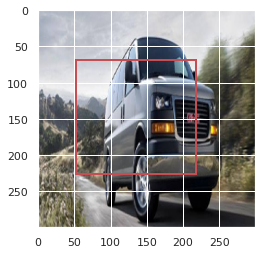

In [ ]:
# Lets visually display any two train data samples

# View any one sample of prepared Train Data 
im=X_Batch[10]
# Show resized image with Box
fig,ax = plt.subplots(1)
ax.imshow(im/255)
res_x0,res_y0,res_x1,res_y1,=region[0][0]
rect = patches.Rectangle((res_x0, res_y0), res_x1 - res_x0, res_y1 - res_y0, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()


In [ ]:
# Get the class
region_class=region[0][0]
predicted_index = np.argmax(region_class)
print(predicted_index +1)

In [ ]:
# What is the actual class
Y_Test[2345]

In [ ]:
#end here 